In [26]:
# ==============================
# 1. Initialize Libraries
# ==============================
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report


Found 50491 images belonging to 36 classes.
Found 50491 images belonging to 36 classes.
Class indices: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35}


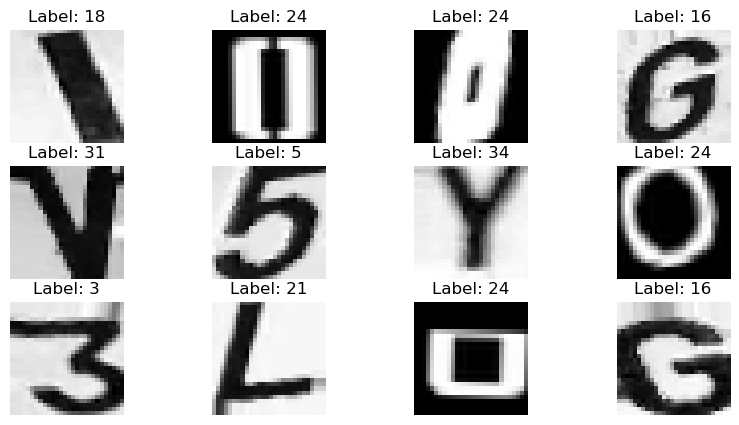

In [27]:
# ==============================
# 2. Dataset paths and parameters
# ==============================
train_dir = r"C:\Users\haiqal\OneDrive\Desktop\Dataset\Train"
test_dir  = r"C:\Users\haiqal\OneDrive\Desktop\Dataset\Test"

img_size = 28
batch_size = 128

# ==============================
# 3. Data preprocessing & augmentation
# ==============================
# Training data: normalization + augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

# Test data: normalization only
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

labels = list(train_generator.class_indices.keys())
print("Class indices:", train_generator.class_indices)

# Visualize a few samples
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10,5))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_batch[i].reshape(img_size, img_size), cmap='gray')
    plt.title(f"Label: {np.argmax(y_batch[i])}")
    plt.axis('off')
plt.show()

# ==============================
# 4. EarlyStopping callback
# ==============================
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

In [28]:
# ==============================
# 5. Model 1: Baseline CNN
# ==============================
model1 = Sequential([
    Input(shape=(img_size,img_size,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(36, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stop]
)


Epoch 1/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 152s 382ms/step - accuracy: 0.6555 - loss: 1.2738 - val_accuracy: 0.9311 - val_loss: 0.3137
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 154s 390ms/step - accuracy: 0.8840 - loss: 0.4293 - val_accuracy: 0.9726 - val_loss: 0.1400
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 146s 369ms/step - accuracy: 0.9329 - loss: 0.2649 - val_accuracy: 0.9840 - val_loss: 0.0867
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 152s 386ms/step - accuracy: 0.9513 - loss: 0.1905 - val_accuracy: 0.9863 - val_loss: 0.0659
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 148s 376ms/step - accuracy: 0.9618 - loss: 0.1497 - val_accuracy: 0.9874 - val_loss: 0.0555
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 148s 375ms/step - accuracy: 0.9681 - loss: 0.1242 - val_accuracy: 0.9906 - val_loss: 0.0443
Epoch 7/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 152s 386ms/step - accuracy: 0.9714 - loss: 0.1067 - val_accuracy: 0.9909 - val_loss: 0.0406
Epoch 8/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 146s 371ms/step - accuracy: 0.9757 -

In [29]:
# ==============================
# 6. Model 2: Deep CNN
# ==============================
model2 = Sequential([
    Input(shape=(img_size,img_size,1)),
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(36, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stop]
)

Epoch 1/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 160s 402ms/step - accuracy: 0.8028 - loss: 0.7225 - val_accuracy: 0.9862 - val_loss: 0.0644
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 158s 399ms/step - accuracy: 0.9604 - loss: 0.1396 - val_accuracy: 0.9898 - val_loss: 0.0332
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 158s 401ms/step - accuracy: 0.9741 - loss: 0.0871 - val_accuracy: 0.9905 - val_loss: 0.0326
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 163s 412ms/step - accuracy: 0.9793 - loss: 0.0709 - val_accuracy: 0.9963 - val_loss: 0.0166
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 159s 402ms/step - accuracy: 0.9853 - loss: 0.0534 - val_accuracy: 0.9983 - val_loss: 0.0084
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 157s 399ms/step - accuracy: 0.9875 - loss: 0.0432 - val_accuracy: 0.9991 - val_loss: 0.0060
Epoch 7/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 160s 405ms/step - accuracy: 0.9888 - loss: 0.0401 - val_accuracy: 0.9992 - val_loss: 0.0044
Epoch 8/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 161s 407ms/step - accuracy: 0.9896 -

In [30]:
# ==============================
# 7. Model 3: CNN + Dropout + BatchNorm
# ==============================
model3 = Sequential([
    Input(shape=(img_size,img_size,1)),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(36, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stop]
)

Epoch 1/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 174s 435ms/step - accuracy: 0.8026 - loss: 0.7231 - val_accuracy: 0.9789 - val_loss: 0.2968
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 171s 434ms/step - accuracy: 0.9500 - loss: 0.1719 - val_accuracy: 0.9870 - val_loss: 0.0451
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 172s 436ms/step - accuracy: 0.9664 - loss: 0.1149 - val_accuracy: 0.9878 - val_loss: 0.0384
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 170s 431ms/step - accuracy: 0.9717 - loss: 0.0927 - val_accuracy: 0.9949 - val_loss: 0.0233
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 170s 431ms/step - accuracy: 0.9768 - loss: 0.0768 - val_accuracy: 0.9976 - val_loss: 0.0102


395/395 ━━━━━━━━━━━━━━━━━━━━ 57s 143ms/step


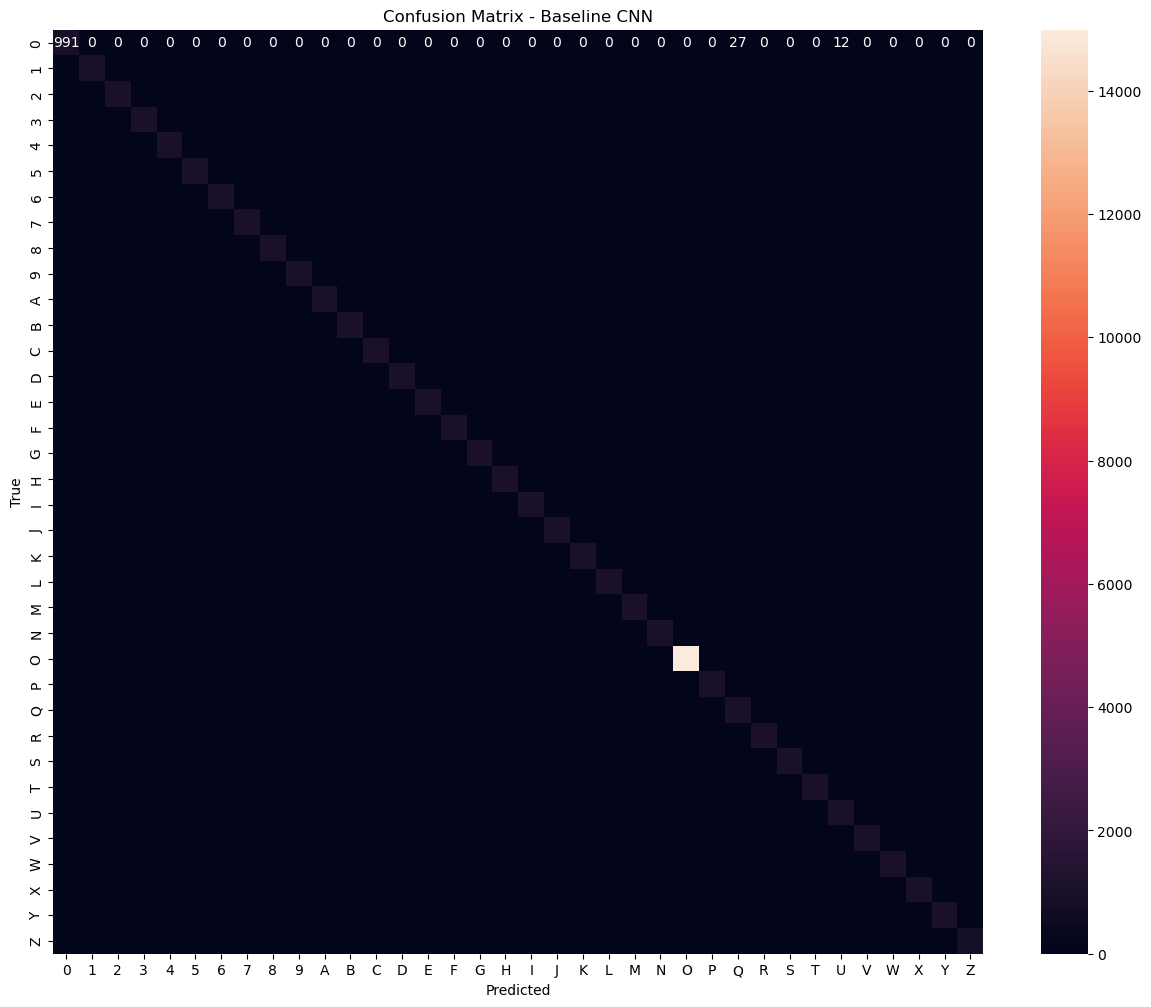

Classification Report - Baseline CNN
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1030
           1       1.00      0.99      1.00      1030
           2       1.00      0.98      0.99      1030
           3       1.00      1.00      1.00      1030
           4       1.00      1.00      1.00      1030
           5       0.99      1.00      1.00      1030
           6       0.99      1.00      0.99      1030
           7       0.99      1.00      1.00      1030
           8       1.00      1.00      1.00      1030
           9       1.00      1.00      1.00      1030
           A       1.00      1.00      1.00      1010
           B       0.99      1.00      0.99      1030
           C       1.00      1.00      1.00      1020
           D       1.00      1.00      1.00      1010
           E       1.00      0.99      1.00      1010
           F       1.00      1.00      1.00      1020
           G       1.00      1.00      1.00 

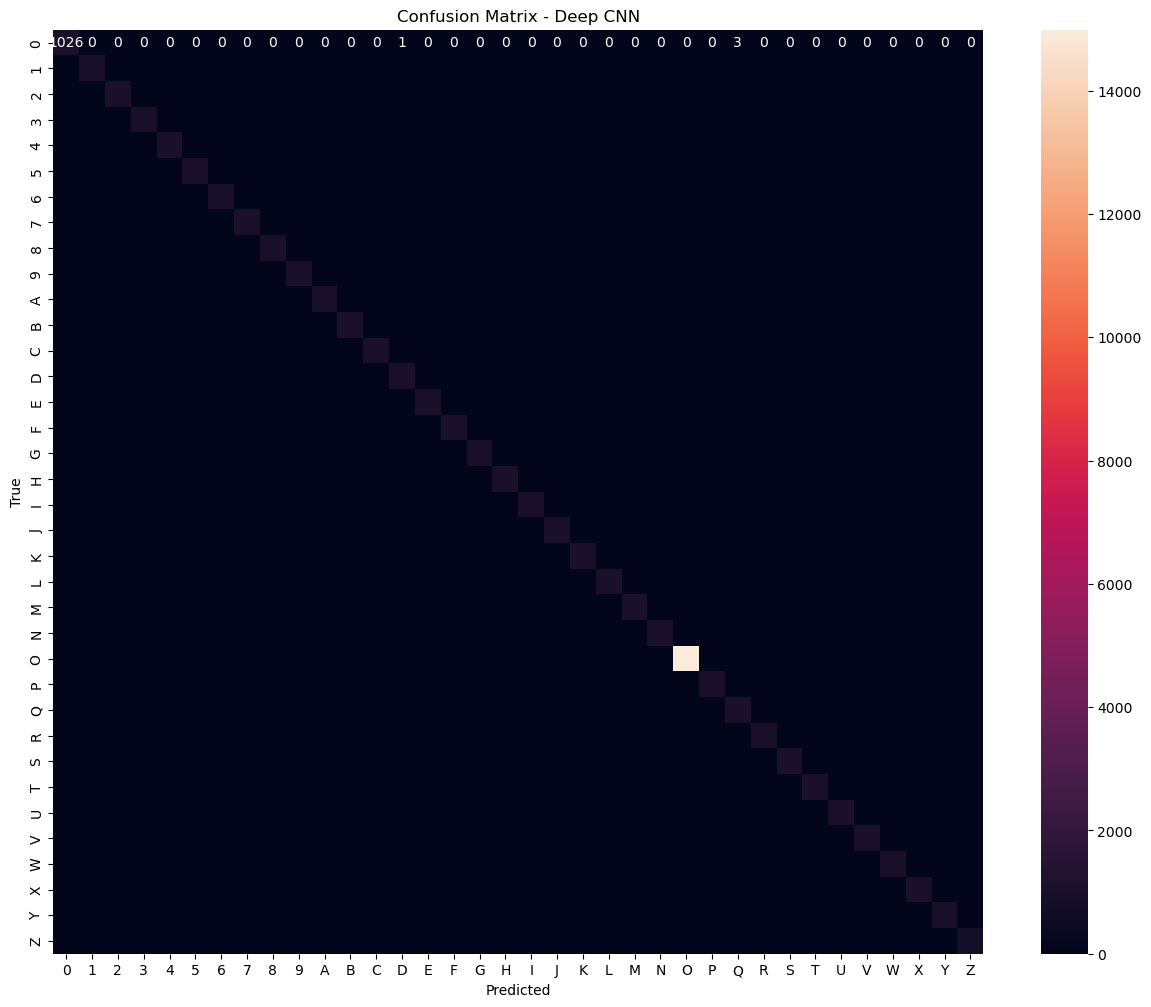

Classification Report - Deep CNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1030
           1       0.99      1.00      1.00      1030
           2       1.00      0.99      1.00      1030
           3       1.00      1.00      1.00      1030
           4       1.00      1.00      1.00      1030
           5       1.00      1.00      1.00      1030
           6       0.99      1.00      1.00      1030
           7       1.00      1.00      1.00      1030
           8       0.99      1.00      1.00      1030
           9       1.00      1.00      1.00      1030
           A       1.00      1.00      1.00      1010
           B       1.00      0.99      1.00      1030
           C       1.00      1.00      1.00      1020
           D       1.00      1.00      1.00      1010
           E       1.00      1.00      1.00      1010
           F       1.00      1.00      1.00      1020
           G       1.00      1.00      1.00     

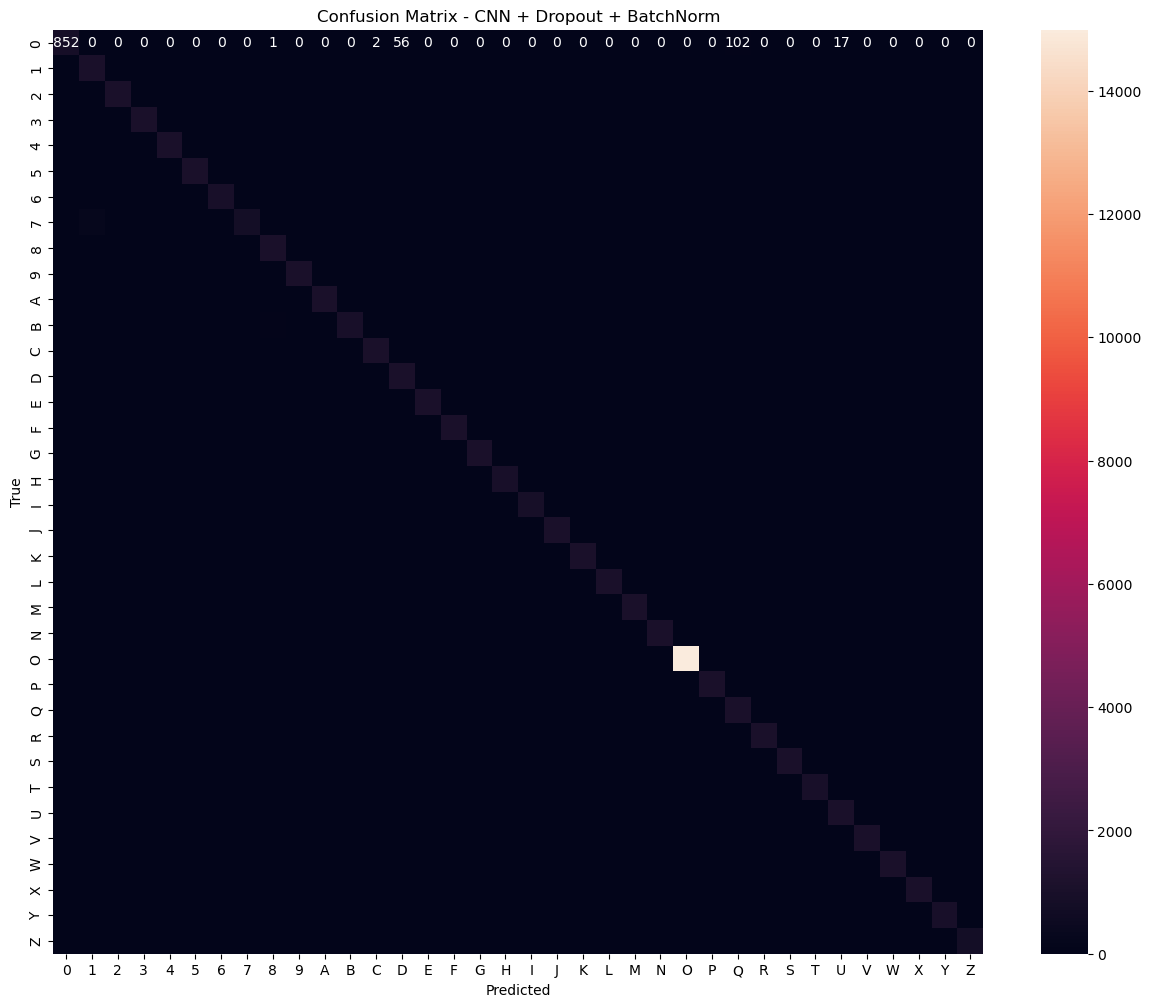

Classification Report - CNN + Dropout + BatchNorm
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1030
           1       0.79      1.00      0.88      1030
           2       0.97      0.97      0.97      1030
           3       0.99      0.98      0.99      1030
           4       0.99      0.97      0.98      1030
           5       0.98      0.97      0.97      1030
           6       0.99      0.96      0.98      1030
           7       1.00      0.78      0.88      1030
           8       0.92      0.97      0.94      1030
           9       0.99      0.98      0.98      1030
           A       0.94      1.00      0.97      1010
           B       0.97      0.92      0.95      1030
           C       0.99      1.00      0.99      1020
           D       0.94      0.99      0.96      1010
           E       0.99      1.00      0.99      1010
           F       1.00      1.00      1.00      1020
           G       1.00      0.

In [31]:
# ==============================
# 8. Evaluation function
# ==============================
def evaluate_model(model, test_generator, labels, model_name="Model"):
    # Predict
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_generator.classes
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(15,12))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    # Classification report
    report = classification_report(y_true, y_pred_classes, target_names=labels)
    print(f"Classification Report - {model_name}")
    print(report)

# ==============================
# 9. Evaluate all models
# ==============================
evaluate_model(model1, test_generator, labels, "Baseline CNN")
evaluate_model(model2, test_generator, labels, "Deep CNN")
evaluate_model(model3, test_generator, labels, "CNN + Dropout + BatchNorm")
